Retrieval systems are fundamental to many AI applications, efficiently identifying relevant information from large datasets. These systems are designed to handle various data formats.

Here's a breakdown of the key concepts:

*   **Data Formats**:
    *   **Unstructured text**, such as documents, is often stored in vector stores or lexical search indexes.
    *   **Structured data** is typically housed in relational or graph databases with defined schemas.
*   **Natural Language Interface**: Modern AI applications aim to make all types of data accessible through natural language interfaces. Models are used to translate natural language queries into formats compatible with the underlying search index or database.
*   **Key Concepts**
    *   **Query Analysis:** This is where models transform or construct search queries to optimise retrieval.
    *   **Information Retrieval**: This involves using search queries to fetch information from various retrieval systems.

**Query Analysis**:

*   **Purpose:** Query analysis bridges the gap between raw user input and optimised search queries.
*   **Applications:**
    *   **Query Re-writing**: Queries can be re-written or expanded to improve semantic or lexical searches. This includes:
        *   **Query Clarification**: Models can rephrase ambiguous or poorly worded queries for clarity.
        *   **Semantic Understanding**: Models can capture the intent behind a query, going beyond literal keyword matching.
        *   **Query Expansion**: Models can generate related terms or concepts to broaden the search scope.
        *  **Complex Query Handling**: Models can break down multi-part questions into simpler sub-queries.
    *   **Query Construction**: Search indexes may require structured queries (e.g., SQL for databases).
*   **Query Re-writing Techniques:** Various techniques have been developed to leverage models for query re-writing:
    *   **Multi-query**: Used to ensure high recall by providing multiple phrasings of a question, retrieving documents for each phrasing, and returning unique documents.
    *   **Decomposition**: Breaks down a question into smaller sub-problems/questions, which can be solved sequentially or in parallel.
    *    **Step-back**: Used when a higher-level conceptual understanding is required. The LLM is prompted to ask a generic step-back question about higher-level concepts, retrieve relevant facts and use that grounding to help answer the user question.
    *   **HyDE**: Used if there are challenges retrieving relevant documents using the raw user inputs, it converts questions into hypothetical documents that answer the question. The embedded hypothetical documents are then used to retrieve real documents.
*   **Query Construction Techniques**: Query analysis can also translate natural language queries into specialised query languages or filters, crucial for interacting with different types of databases.
    *   **Text-to-SQL**: Converts natural language to SQL for relational databases.
    *   **Text-to-Cypher**: Converts natural language to Cypher for graph databases.
     *   **Natural Language to Metadata Filters**: Converts user queries into appropriate metadata filters, which is useful because often questions are about the metadata of documents rather than the content itself. This can be done using a `SelfQueryRetriever`.

**Information Retrieval**:

*   **Common Retrieval Systems**:
    *   **Lexical Search Indexes**: These match words in a query to words in each document using algorithms based on word frequencies. An inverted index is commonly used, which contains a list of words and a mapping of each word to a list of locations in documents. Popular lexical search algorithms are BM25 and TF-IDF.
    *   **Vector Indexes**: These use an embedding model to compress documents into high-dimensional vector representations, allowing for efficient similarity searches.
    *   **Relational Databases**: Organise data into tables with predefined schemas. Data is stored in rows (records) and columns (attributes), allowing for efficient querying and manipulation through SQL.
    *   **Graph Databases**: Store and manage highly interconnected data, using a flexible structure consisting of nodes (entities), edges (relationships), and properties.

**Retriever**:

*   **Unified Interface**: LangChain provides a unified interface for interacting with various retrieval systems through the retriever concept.
*  **Functionality**: The interface takes a query (string) as an input and outputs a list of documents (standardised LangChain Document objects).
*   **Usage**: A retriever can be created using any of the retrieval systems mentioned earlier, and the query analysis techniques enable natural language interfaces for databases that typically require structured query languages. For example, a retriever for a SQL database can be built using text-to-SQL conversion.
*   **Common Interface**: All retrievers in LangChain share a common interface, allowing you to use them with the `invoke` method.

In summary, retrieval systems are a core component of many AI applications, and LangChain offers tools and interfaces to manage these systems. Query analysis is used to optimise the translation of user queries into an appropriate format, and information retrieval is used to fetch relevant information. LangChain offers a unified interface through the retriever concept to work with these systems.

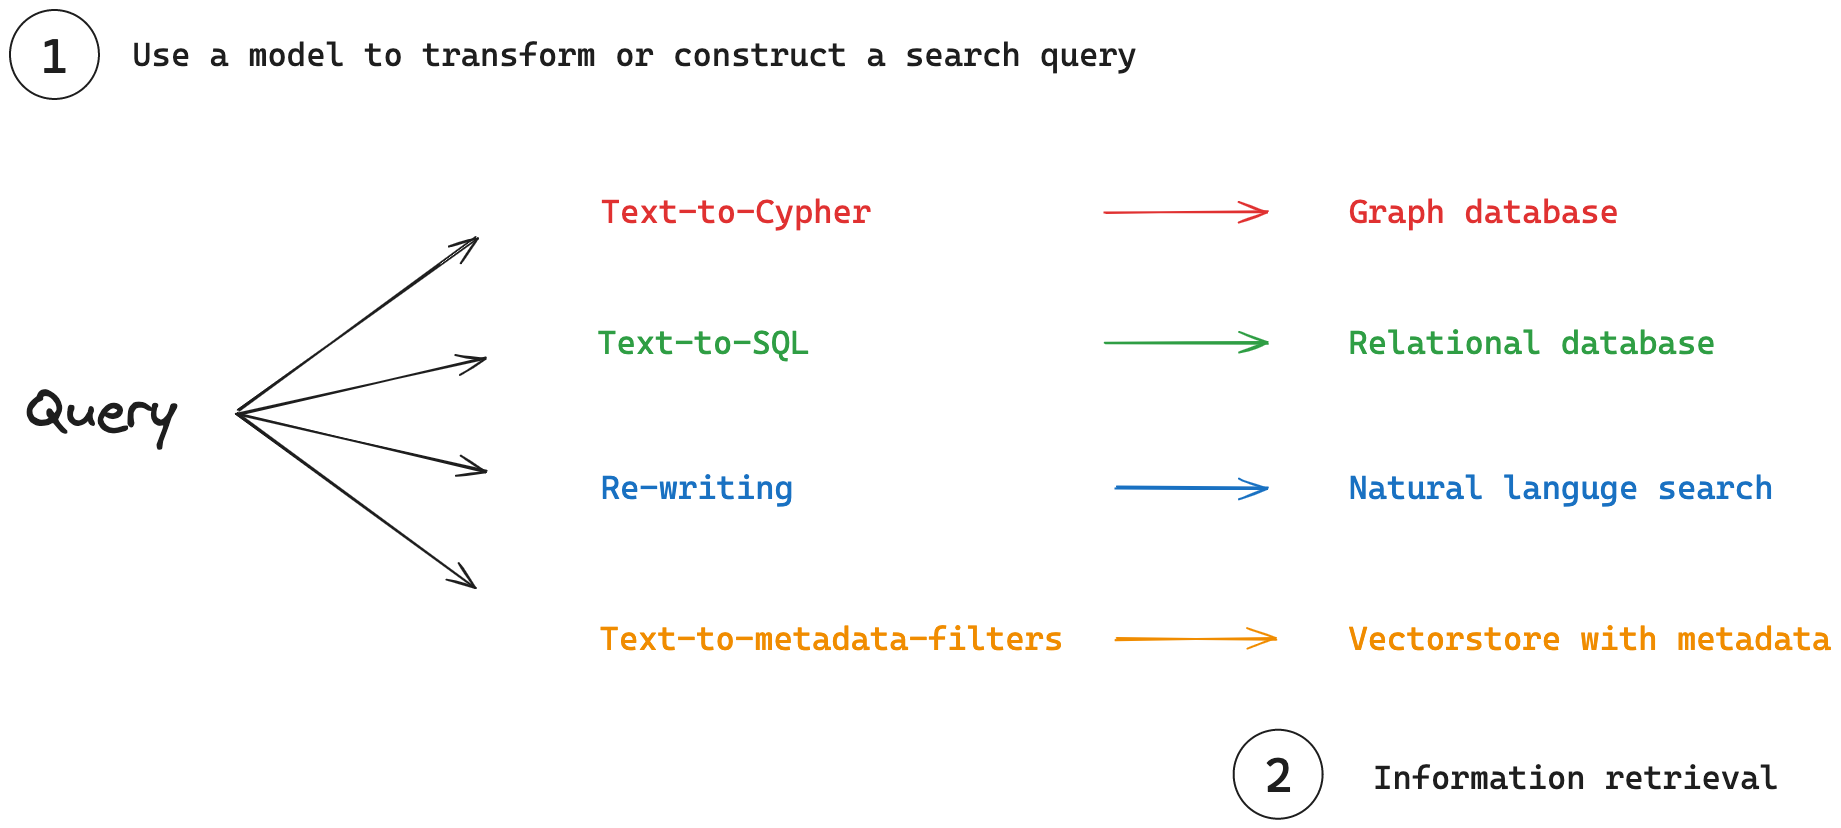


In [5]:
#  query decomposition

from typing import List

from pydantic import BaseModel, Field
from langchain_ollama import ChatOllama
from langchain_core.messages import SystemMessage, HumanMessage

# Define a pydantic model to enforce the output structure
class Questions(BaseModel):
    questions: List[str] = Field(
        description="A list of sub-questions related to the input query."
    )

# Create an instance of the model and enforce the output structure
model = ChatOllama(model="llama3.3", temperature=0) 
structured_model = model.with_structured_output(Questions)

# Define the system prompt
system = """You are a helpful assistant that generates multiple sub-questions related to an input question. \n
The goal is to break down the input into a set of sub-problems / sub-questions that can be answered in isolation. \n"""

# Pass the question to the model
question = """What are the main components of an LLM-powered autonomous agent system?"""
questions = structured_model.invoke([SystemMessage(content=system)]+[HumanMessage(content=question)])

for q in questions.questions:
    print(q)

What is the role of natural language processing in an LLM-powered autonomous agent system?
How does computer vision contribute to the functionality of an LLM-powered autonomous agent system?
What are the key components of the machine learning model in an LLM-powered autonomous agent system?
How does the autonomous agent system integrate with its environment and make decisions?
What are the primary sensors and data sources used by an LLM-powered autonomous agent system?
